Email Classification Models

In [1]:
#import requried libries
import numpy as np
import pandas as pd
import glob
from nltk.corpus import stopwords
import gc
import nltk
pd.options.mode.chained_assignment = None

In [2]:
# #download stop words  -  A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
stp = stopwords.words('english')
nltk.download('stopwords')
words = set(nltk.corpus.words.words())
type(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikmb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


set

In [3]:
#function to create a dictionory for each class
def create_email_class(path):
    filenames = glob.glob(path + '/**/*.res', recursive=True)
    claz = {}
    for filename in filenames:
        x = pd.read_csv(filename, delimiter=" ", names=["word", "frequency"], encoding = "ISO-8859-1", engine='python') #read the file
        x = x.dropna() #drop null values from the dataframe
        x['word'].str.lower() # convert the words to lower case
        x = x[~x['word'].isin(stp)] #remove stop words
        x = x[x['word'].isin(words)] #only retain english words
        doc = '' 
        for index, row in x.iterrows():
            for i in range(int(row['frequency'])):
                doc = doc + ' ' + row['word'] #recreate the emails using the word and frequency information
        claz[filename] = doc #this is class emails in a single dictionary
    return claz

In [4]:
#ingesting the train set
classA = create_email_class(r'D:\Intern\Email_classification\Train\class_A_train')
classB = create_email_class(r'D:\Intern\Email_classification\Train\class_B_train')
classC = create_email_class(r'D:\Intern\Email_classification\Train\class_C_train')
classD = create_email_class(r'D:\Intern\Email_classification\Train\class_D_train')
classE = create_email_class(r'D:\Intern\Email_classification\Train\class_E_train')
classF = create_email_class(r'D:\Intern\Email_classification\Train\class_F_train')
classG = create_email_class(r'D:\Intern\Email_classification\Train\class_G_train')
classH = create_email_class(r'D:\Intern\Email_classification\Train\class_H_train')
classI = create_email_class(r'D:\Intern\Email_classification\Train\class_I_train')

In [5]:
#ingesting the validation set
vclassA = create_email_class(r'D:\Intern\Email_classification\Validation\class_A_validation')
vclassB = create_email_class(r'D:\Intern\Email_classification\Validation\class_B_validation')
vclassC = create_email_class(r'D:\Intern\Email_classification\Validation\class_C_validation')
vclassD = create_email_class(r'D:\Intern\Email_classification\Validation\class_D_validation')
vclassE = create_email_class(r'D:\Intern\Email_classification\Validation\class_E_validation')
vclassF = create_email_class(r'D:\Intern\Email_classification\Validation\class_F_validation')
vclassG = create_email_class(r'D:\Intern\Email_classification\Validation\class_G_validation')
vclassH = create_email_class(r'D:\Intern\Email_classification\Validation\class_H_validation')
vclassI = create_email_class(r'D:\Intern\Email_classification\Validation\class_I_validation')


In [6]:
#ingesting the test set
tclass= create_email_class(r'D:\Intern\Email_classification\TestSet\Test')

In [7]:
#combine all the dictionaries together to get the corpus and pass on to the vectorizer
z_dict = {**classA, **classB, **classC, **classD, **classE, **classF, **classG, **classH, **classI, **vclassA, **vclassB, **vclassC, **vclassD, **vclassE, **vclassF, **vclassG, **vclassH, **vclassI, **tclass}
from random import shuffle
import random
#keys =  list(z_dict.keys())      
#random.shuffle(keys)
gc.collect()

1753

In [8]:
#generating tf-idf values
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500) 
vectors = vectorizer.fit_transform(z_dict.values())
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [9]:
#this is  resulting dataframe
df

,able,access,action,actually,add,address,advance,ago,agree,allow,...,working,world,write,wrong,wrote,year,yes,yet,york,young
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.000000,0.498285,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
9182,0.106138,0.000000,0.0,0.054417,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.042903,0.0,0.059674,0.0,0.0
9183,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.135435,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
9184,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.282945,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [10]:
train_size = len(classA) + len(classB) + len(classC)+ len(classD)+ len(classE)+ len(classF)+ len(classG)+ len(classH)+ len(classI)
train_size

5659

In [11]:
val_size = len(vclassA) + len(vclassB) + len(vclassC)+ len(vclassD)+ len(vclassE)+ len(vclassF)+ len(vclassG)+ len(vclassH)+ len(vclassI)
val_size

611

In [12]:
test_size = len(tclass)
test_size

2916

In [13]:
train_set = df.loc[0:train_size-1]
val_set = df.loc[train_size:train_size+val_size-1]
test_set = df.loc[train_size+val_size:train_size+val_size+test_size-1]

In [14]:
#create dataframe for each class and assign number for each class
train_set['class'] = 0
df1=train_set.loc[0:len(classA)-1] #add the class=1 for classA 
df1['class'] = 1
df2=train_set.loc[len(classA):len(classA)+len(classB)-1]
df2['class'] = 2
df3=train_set.loc[len(classA)+len(classB):len(classA)+len(classB)+len(classC)-1]
df3['class'] = 3
df4=train_set.loc[len(classA)+len(classB)+len(classC):len(classA)+len(classB)+len(classC)+len(classD)-1]
df4['class'] = 4
df5=train_set.loc[len(classA)+len(classB)+len(classC)+len(classD):len(classA)+len(classB)+len(classC)+len(classD)+len(classE)-1]
df5['class'] = 5
df6=train_set.loc[len(classA)+len(classB)+len(classC)+len(classD)+len(classE):len(classA)+len(classB)+len(classC)+len(classD)+len(classE)+len(classF)-1]
df6['class'] = 6
df7=train_set.loc[len(classA)+len(classB)+len(classC)+len(classD)+len(classE)+len(classF):len(classA)+len(classB)+len(classC)+len(classD)+len(classE)+len(classF)+len(classG)-1]
df7['class'] = 7
df8=train_set.loc[len(classA)+len(classB)+len(classC)+len(classD)+len(classE)+len(classF)+len(classG):len(classA)+len(classB)+len(classC)+len(classD)+len(classE)+len(classF)+len(classG)+len(classH)-1]
df8['class'] = 8
df9=train_set.loc[len(classA)+len(classB)+len(classC)+len(classD)+len(classE)+len(classF)+len(classG)+len(classH):len(classA)+len(classB)+len(classC)+len(classD)+len(classE)+len(classF)+len(classG)+len(classH)+len(classI)-1]
df9['class'] = 9

In [15]:
#concat all dataframes together
dff=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
dff= dff.sample(frac=1).reset_index(drop=True)
dff


,able,access,action,actually,add,address,advance,ago,agree,allow,...,world,write,wrong,wrote,year,yes,yet,york,young,class
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.121938,0.085808,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.174135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.109959,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.174427,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.357552,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.180106,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5
5655,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.088768,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
5656,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119552,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7
5657,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,6


In [16]:
#assign independent and dependent variables
X = dff.iloc[:,0:-1] 
y = dff['class']

In [22]:
#split into train and test sets and scaled
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#function to print accuracy report
def get_repotrt(pred,clf):
    #importing confusion matrix
    #confusion = confusion_matrix(y_test, pred)
    fig = plot_confusion_matrix(clf1, X_test, y_test)
    fig.figure_.suptitle( '\nConfusion Matrix ')
    plt.show()
    

    #importing accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy Report for:',clf ,'\n')
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

    from sklearn.metrics import classification_report
    print('\nClassification Report for:',clf ,'\n')
    target_names=['ClassA', 'ClassB', 'ClassC', 'ClassD', 'ClassE', 'ClassF', 'ClassG', 'ClassH', 'ClassI']
    print(classification_report(y_test, pred,target_names=target_names ))



d:\Intern\Email_classification\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


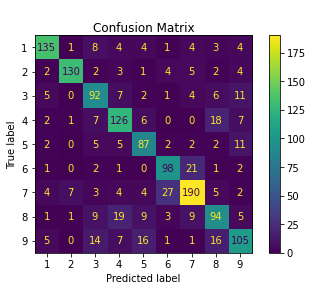


Accuracy Report for: MLPClassifier 


Accuracy: 0.75

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.74
Macro Recall: 0.75
Macro F1-score: 0.74

Weighted Precision: 0.75
Weighted Recall: 0.75
Weighted F1-score: 0.75

Classification Report for: MLPClassifier 

              precision    recall  f1-score   support

      ClassA       0.86      0.82      0.84       164
      ClassB       0.93      0.85      0.89       153
      ClassC       0.65      0.72      0.68       128
      ClassD       0.72      0.75      0.73       167
      ClassE       0.67      0.75      0.71       116
      ClassF       0.72      0.78      0.75       126
      ClassG       0.81      0.77      0.79       246
      ClassH       0.64      0.63      0.63       150
      ClassI       0.70      0.64      0.66       165

    accuracy                           0.75      1415
   macro avg       0.74      0.75      0.74      1415
weighted avg       0.75      0.75      0.75      1415


In [46]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier


clf1 = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
get_repotrt(y_pred1,'MLPClassifier')



d:\Intern\Email_classification\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


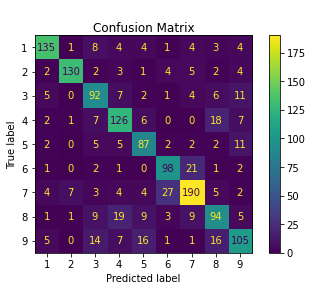


Accuracy Report for: MultinomialNB 


Accuracy: 0.77

Micro Precision: 0.77
Micro Recall: 0.77
Micro F1-score: 0.77

Macro Precision: 0.78
Macro Recall: 0.75
Macro F1-score: 0.76

Weighted Precision: 0.77
Weighted Recall: 0.77
Weighted F1-score: 0.77

Classification Report for: MultinomialNB 

              precision    recall  f1-score   support

      ClassA       0.80      0.88      0.84       164
      ClassB       0.90      0.91      0.91       153
      ClassC       0.77      0.66      0.71       128
      ClassD       0.81      0.77      0.79       167
      ClassE       0.72      0.66      0.68       116
      ClassF       0.91      0.59      0.71       126
      ClassG       0.75      0.91      0.82       246
      ClassH       0.64      0.66      0.65       150
      ClassI       0.68      0.72      0.70       165

    accuracy                           0.77      1415
   macro avg       0.78      0.75      0.76      1415
weighted avg       0.77      0.77      0.77      1415


In [47]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB( alpha=.01, fit_prior=True) 

clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
get_repotrt(y_pred2,'MultinomialNB')


d:\Intern\Email_classification\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


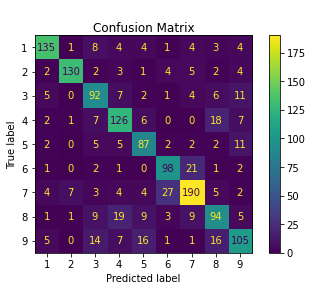


Accuracy Report for: SVC 


Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.77
Macro Recall: 0.77
Macro F1-score: 0.77

Weighted Precision: 0.78
Weighted Recall: 0.78
Weighted F1-score: 0.77

Classification Report for: SVC 

              precision    recall  f1-score   support

      ClassA       0.84      0.85      0.85       164
      ClassB       0.82      0.95      0.88       153
      ClassC       0.68      0.71      0.70       128
      ClassD       0.77      0.81      0.79       167
      ClassE       0.76      0.71      0.73       116
      ClassF       0.83      0.69      0.75       126
      ClassG       0.81      0.84      0.82       246
      ClassH       0.69      0.65      0.67       150
      ClassI       0.75      0.69      0.72       165

    accuracy                           0.78      1415
   macro avg       0.77      0.77      0.77      1415
weighted avg       0.78      0.78      0.77      1415



In [48]:
# Support Vector Classifier
from sklearn.svm import SVC
clf3 = SVC(C=1, kernel='linear', random_state=0, gamma=1).fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
get_repotrt(y_pred3,'SVC')


d:\Intern\Email_classification\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


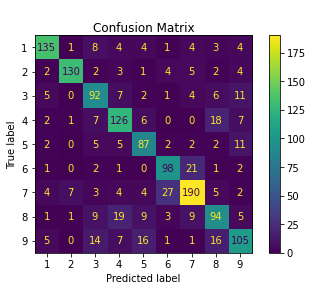


Accuracy Report for: Random Forest Classifier 


Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.63
Macro Recall: 0.62
Macro F1-score: 0.62

Weighted Precision: 0.63
Weighted Recall: 0.64
Weighted F1-score: 0.63

Classification Report for: Random Forest Classifier 

              precision    recall  f1-score   support

      ClassA       0.67      0.85      0.75       164
      ClassB       0.68      0.85      0.75       153
      ClassC       0.56      0.45      0.50       128
      ClassD       0.59      0.60      0.60       167
      ClassE       0.72      0.63      0.67       116
      ClassF       0.68      0.58      0.63       126
      ClassG       0.70      0.75      0.73       246
      ClassH       0.48      0.40      0.44       150
      ClassI       0.57      0.49      0.53       165

    accuracy                           0.64      1415
   macro avg       0.63      0.62      0.62      1415
weighted avg       0.63      0.6

In [49]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42) #train a random forest model
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
get_repotrt(y_pred4,'Random Forest Classifier')
